In [1]:
import netCDF4 as nc
import numpy as np
import pandas as pd
date = pd.date_range(start="20230101", end="20230102", freq='D')

In [2]:
vars = {}
i = date[0]

data = nc.Dataset("/home/mafzhang/data/GLORYS12/2023/Glorys12-{:02d}-{:02d}.nc".format(i.month, i.day))
print(data.variables.keys())
so = np.array(data.variables['so'])
thetao = np.array(data.variables['thetao'])
uo = np.array(data.variables['uo'])
vo = np.array(data.variables['vo'])

dict_keys(['depth', 'latitude', 'longitude', 'time', 'mlotst', 'so', 'thetao', 'uo', 'vo'])


In [3]:
carbon = nc.Dataset("/home/mafzhang/data/GLORYS12_bio/2023/Glorys12-carbon-{:02d}-{:02d}.nc".format(i.month, i.day))
dissic = np.array(carbon.variables['dissic'])
ph = np.array(carbon.variables['ph'])
talk = np.array(carbon.variables['talk'])

[32 32 32 ... 34 34 34]
[2.1939778 2.1939778 2.1939778 ... 2.388905  2.388905  2.388905 ]


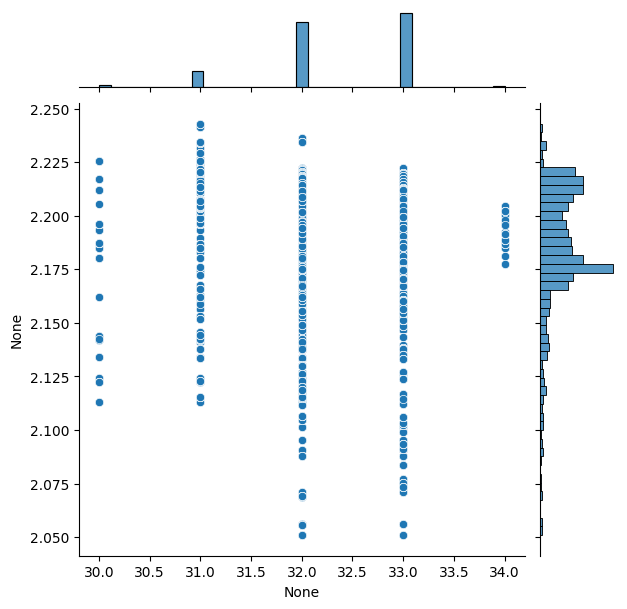

In [6]:
import seaborn as sns

mask_so = so>-30000
tmp = np.repeat(dissic, 3, axis=2)
tmp = np.repeat(tmp, 3, axis=3)
tmp = tmp[:,:,1:-1]
mask_dissic = tmp<5001

mask = np.bitwise_and(mask_so, mask_dissic)
print(so[mask])
print(tmp[mask])
sns.jointplot(x=so[mask].reshape(-1)[:5000], y=tmp[mask].reshape(-1)[:5000], kind='scatter')

[32 32 32 ... 34 34 34]
[8.130935 8.130935 8.130935 ... 7.697123 7.697123 7.697123]


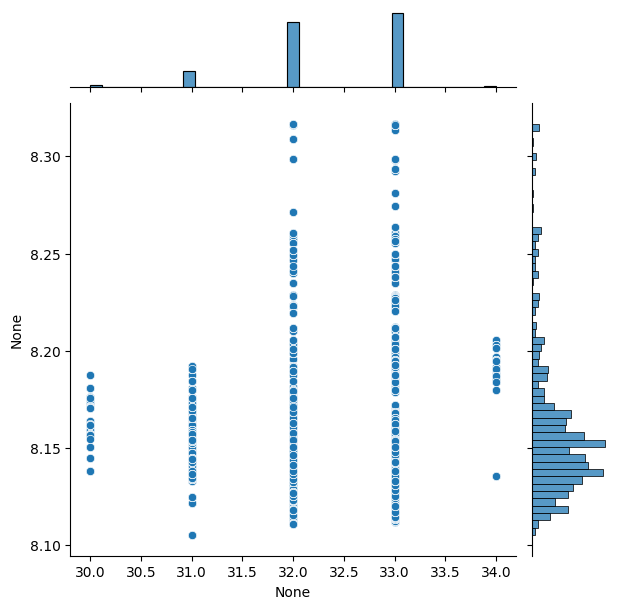

In [7]:
import seaborn as sns

mask_so = so>-30000
tmp = np.repeat(ph, 3, axis=2)
tmp = np.repeat(tmp, 3, axis=3)
tmp = tmp[:,:,1:-1]
mask_dissic = tmp<5001

mask = np.bitwise_and(mask_so, mask_dissic)
print(so[mask])
print(tmp[mask])
sns.jointplot(x=so[mask].reshape(-1)[:5000], y=tmp[mask].reshape(-1)[:5000], kind='scatter')

[32 32 32 ... 34 34 34]
[2.1939778 2.1939778 2.1939778 ... 2.388905  2.388905  2.388905 ]


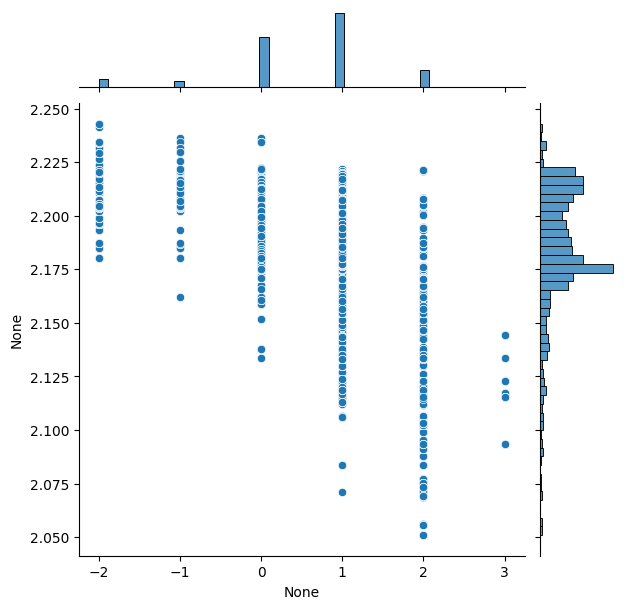

In [8]:
import seaborn as sns

mask_thetao = thetao>-30000
tmp = np.repeat(dissic, 3, axis=2)
tmp = np.repeat(tmp, 3, axis=3)
tmp = tmp[:,:,1:-1]
mask_dissic = tmp<5001

mask = np.bitwise_and(mask_thetao, mask_dissic)
print(so[mask])
print(tmp[mask])
sns.jointplot(x=thetao[mask].reshape(-1)[:5000], y=tmp[mask].reshape(-1)[:5000], kind='scatter')